# Summer school of economics Bogotá 2020
### Economic growth and comparative development
### Paper replication
##### By: María Paula Castañeda 

Paper: Survival of the richest? Social status, fertility and social mobility in England 

Authors: NINA BOBERG-FAZLIC, PAUL SHARP AND JACOB WEISDORF

### Introduction
We use data collected by the Cambridge Group to investigate and explain differences in fertility by socio-economic group in pre-industrial England. We find, in line with results presented by Greg Clark, that wealthier groups did indeed have higher fertility until the 1700s. We demonstrate that this had to do with earlier age at marriage for women. We then turn to the likely social and economic impact of this, considering Clark’s hypothesis that ‘middle-class values’ spread through English society prior to the Industrial Revolution. Through the construction of social mobility tables, we demonstrate that the children of the rich were indeed spreading through society, but they were small in number relative to poorer sections of society, and moreover the children of the poor were also entering the middle classes.


In [12]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import folium

%matplotlib inline

This data was requested in the UK Data service. The dataset name is "26 English parish family reconstitutions" and is identificated by SN 853082 number. In this link you can download the data http://reshare.ukdataservice.ac.uk/853082/


### 2. The data 

In [3]:
# Load the data
data = pd.read_csv('C:/Users/c804268/Documents/Curso_verano/All26FamRecons/26ParishesReconstitutions_ALL_DATA.txt', sep='\t')

C:\Users\c804268\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,6,8,10,12,13,14,21,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,47,48,50,51,52,59,62,63,64,65,66,67,68,70,71,73,74,76,77,79,80,94,96,97,100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
[x for x in data.columns]

['marriages_parfrf',
 'marriages_parish',
 'marriages_FRF',
 'marriages_Marriage_Place',
 'marriages_MarDate',
 'marriages_MarWeighting',
 'marriages_MarEndDate',
 'marriages_EndWeighting',
 'marriages_MarNextDate',
 'marriages_NextWeighting',
 'marriages_Comments',
 'husbands_FRF',
 'husbands_Flag',
 'husbands_Surname',
 'husbands_Forename',
 'husbands_BapDate',
 'husbands_BapWeighting',
 'husbands_BirthDate',
 'husbands_BirthWeighting',
 'husbands_BurialDate',
 'husbands_BurialWeighting',
 'husbands_DeathDate',
 'husbands_DeathWeighting',
 'husbands_MarriageOrder',
 'husbands_EarlierFRF',
 'husbands_LaterFRF',
 'husbands_BapResidence',
 'husbands_MarResidence',
 'husbands_MarOccupation',
 'husbands_BurialRes',
 'husbands_BurialOcc',
 'husbands_AddDate1',
 'husbands_AddRes1',
 'husbands_AddOcc1',
 'husbands_AddDate2',
 'husbands_AddRes2',
 'husbands_AddOcc2',
 'husbands_AddDate3',
 'husbands_AddRes3',
 'husbands_AddOcc3',
 'husbands_AddDate4',
 'husbands_AddRes4',
 'husbands_AddOcc4',

In [44]:
#Exploring the data 
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns

In [45]:
missing_values_table(data)

,Missing Values,% of Total Values
marriages_parfrf,0,0.000000
marriages_parish,0,0.000000
marriages_FRF,0,0.000000
marriages_Marriage_Place,122820,40.097158
marriages_MarDate,116262,37.956161
marriages_MarWeighting,302336,98.703910
marriages_MarEndDate,218157,71.221915
marriages_EndWeighting,305293,99.669285
marriages_MarNextDate,289048,94.365765
marriages_NextWeighting,306024,99.907935


### Parishes 

In [5]:
parishes = pd.read_excel("C:/Users/c804268/Documents/Curso_verano/Coordenadas.xlsx")

In [6]:
parishes["Latitud"] = parishes["Latitud"].astype('float64')
parishes["Longitud"] = parishes["Longitud"].astype('float64')

In [7]:
latmean = parishes["Latitud"].mean()
lonmean = parishes["Longitud"].mean()

In [10]:
m = folium.Map(location=[latmean, lonmean], zoom_start=5.5)

In [11]:
for lat,lon,name in zip(data['Latitud'],data['Longitud'],data["Parish, county"]):
    folium.Marker(location=[lat,lon],popup = name,icon= folium.Icon(color="green")).add_to(m)

In [ ]:
m

In the map it is possible to see that the sample of the 26 parishes covers the great majority of the territory of England.

### 2.1. Description of the data 

In [48]:
# Filter the husband dataset 
husbands = data[["husbands_BapDate" , "husbands_BapWeighting" , "husbands_BirthDate" , "husbands_BirthWeighting" , "husbands_BurialDate" ,
                     "husbands_BurialWeighting", "husbands_DeathDate","husbands_DeathWeighting","husbands_MarriageOrder","husbands_EarlierFRF",
                     "husbands_LaterFRF","husbands_BapResidence","husbands_MarResidence","husbands_MarOccupation","husbands_BurialRes",
                     "husbands_BurialOcc","husbands_AddDate1","husbands_AddRes1","husbands_AddOcc1","husbands_AddDate2","husbands_AddRes2",
                     "husbands_AddOcc2","husbands_AddDate3","husbands_AddRes3","husbands_AddOcc3","husbands_AddDate4","husbands_AddRes4",
                     "husbands_AddOcc4","husbands_AddDate5","husbands_AddRes5","husbands_AddOcc5","husbands_AddDate6","husbands_AddRes6",
                     "husbands_AddOcc6",'marriages_parfrf', 'marriages_MarDate','children_ChildNumber','children_BirthDate' ]]

In [49]:
husbands['children'] = np.where(husbands['children_ChildNumber'].notnull(),1,0)

C:\Users\c804268\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
df_sons_marriage = husbands.groupby(["marriages_parfrf"], as_index=False).agg({"children": "sum"})

In [51]:
husbands = husbands.merge(df_sons_marriage, how='left', on=["marriages_parfrf"])

In [52]:
#Filter just this husbands that were fathers 
fathers = husbands[husbands['children_y']!=0]

In [53]:
fathers = fathers.drop_duplicates(subset=['marriages_parfrf'])

In [54]:
fathers.shape

(80708, 40)

In [55]:
# Delete records that have no burial date 
fathers = fathers.dropna(axis=0,subset=['husbands_BurialDate'])

In [56]:
# Delete record before 1825 
fathers['marriages_MarDate'] = pd.to_datetime(fathers['marriages_MarDate'], errors='coerce', format= '%d-%m-%Y')
fathers['children_BirthDate'] = pd.to_datetime(fathers['children_BirthDate'], errors='coerce', format= '%d-%m-%Y')

In [58]:
fathers['date'] = fathers['marriages_MarDate'].fillna(fathers['children_BirthDate'])

In [59]:
fathers['year'] = pd.DatetimeIndex(fathers['date']).year

In [68]:
fathers.shape

(34709, 43)

In [65]:
# Using the father's occupation at the time of his death for those who have no occupation at the time of marriage
fathers_new['husbands_occufinal'] = fathers_new['husbands_MarOccupation'].fillna(fathers_new['husbands_BurialOcc'])

C:\Users\c804268\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


This transformation leaves us with about 10 thousand records for the analysis of fertility according to social class. As mentioned in the paper in the description of the data on page five

### 2.2. Availability and classification of occupations 

In [99]:
## Plot the frequency of occuptions 
freq = pd.DataFrame(fathers[["year", 'husbands_occufinal']]['year'].value_counts()).reset_index()
freq.columns = ["year", "freq_year"]
freq = freq.sort_values(by=["year"], ascending=True)
freq = freq[freq["year"]<1825]

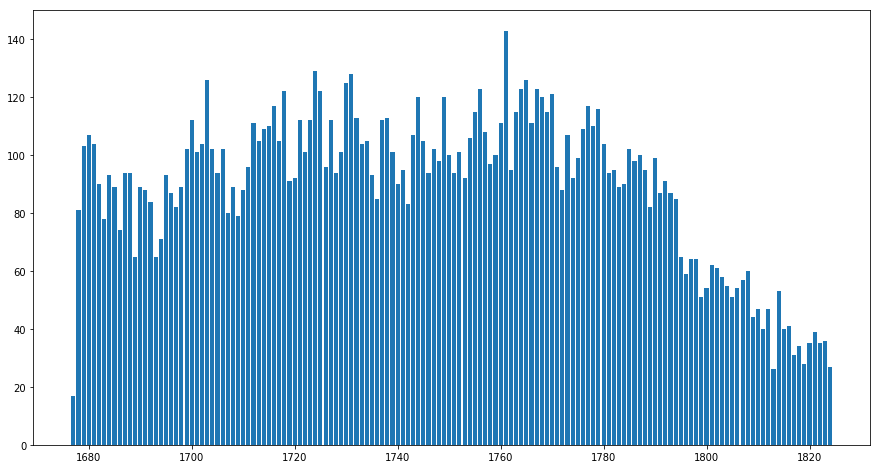

In [108]:
#Graph
fig = plt.gcf()
fig.set_size_inches(15, 8)

# Create bars
plt.bar(freq["year"].tolist(), freq["freq_year"].tolist())
 
# Show graphic
plt.show()

In [69]:
fathers.isnull().sum()

husbands_BapDate            21281
husbands_BapWeighting       34592
husbands_BirthDate          30650
husbands_BirthWeighting     31078
husbands_BurialDate             0
husbands_BurialWeighting    34508
husbands_DeathDate          34043
husbands_DeathWeighting     34701
husbands_MarriageOrder         41
husbands_EarlierFRF         31374
husbands_LaterFRF           30520
husbands_BapResidence       28725
husbands_MarResidence       23692
husbands_MarOccupation      31926
husbands_BurialRes          19967
husbands_BurialOcc          25490
husbands_AddDate1           19964
husbands_AddRes1            23927
husbands_AddOcc1            25387
husbands_AddDate2           29904
husbands_AddRes2            30981
husbands_AddOcc2            31512
husbands_AddDate3           32919
husbands_AddRes3            33107
husbands_AddOcc3            33740
husbands_AddDate4           33965
husbands_AddRes4            34003
husbands_AddOcc4            34309
husbands_AddDate5           34399
husbands_AddRe